# 0. Preparation

In [33]:
import pandas as pd
import networkx as nx
import numpy as np
import json
import csv
import os
import scipy
import matplotlib.pyplot as plt
# from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
# save edge as CSV
nodes_df = pd.read_csv('./data/node.csv', sep = ',', error_bad_lines=False)
nodes_subset = nodes_df[['rpid', 'parent']]
edges_df = nodes_subset[nodes_subset['parent'] != 0]
cwd = os.getcwd()
directory = cwd + '/data/edge.csv'
edges_df.to_csv(directory, encoding="utf_8_sig", index=False)

nodes_df.head()
edges_df.head()

,rpid,parent
1,3061437039,3061361771
2,3061442881,3061361771
3,3061455886,3061361771
4,3061451247,3061361771
5,3061456039,3061361771


# 1. Tidy the data

In [3]:
with open('./data/node.csv', 'r') as nodecsv: 
    nodereader = csv.reader(x.replace('\0', '') for x in nodecsv) # there are NUL byte in the csv file
    # nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]
    
node_names = [n[0] for n in nodes]

with open('./data/edge.csv', 'r') as edgecsv: 
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

In [4]:
nodes[1]
# edges[1]

['3061437039',
 '286054084',
 '1',
 '81922299',
 '3061361771',
 '3061361771',
 '3061437039',
 '0',
 '0',
 '0',
 '0',
 '1024',
 '1592623494',
 '3061437039',
 '3061361771',
 '3061361771',
 '4059',
 '0',
 '81922299',
 '且朔州',
 '男',
 '',
 'http://i0.hdslb.com/bfs/face/c9a1dba5321f4f8f00c1b3e138e5d0fab1c87376.jpg',
 '10000',
 '0',
 '5',
 '0',
 '0',
 '0',
 '0',
 '',
 '',
 '0',
 '',
 '',
 '0',
 '',
 '',
 '',
 '',
 '',
 '-1',
 '',
 '1',
 '1610640000000',
 '',
 '0',
 '0',
 '',
 '0',
 '',
 '',
 '',
 '0',
 '0',
 '到底是谁给他们的勇气呢？[doge]',
 '2',
 '',
 '999',
 '0',
 'False',
 'False',
 '',
 'False',
 'False',
 'False',
 'False']

In [5]:
print(len(nodes))
print(len(edges))

21034
9615


In [69]:
df = pd.DataFrame.from_records(nodes)
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(21034, 67)


# 2. Graph initialization

In [81]:
G=nx.Graph()
# G = nx.DiGraph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 18961
Number of edges: 9197
Average degree:   0.9701


# 3. Edge attributes

In [82]:
# 67 attributes in total
# ref: Crawler/data/sample/structure-common-key
rpid = {}
oid = {}
rtype = {}
mid = {}
root = {}
parent = {}
dialog = {}
count = {}
rcount = {}
state = {}
fansgrade = {}
attr = {}
ctime = {}
rpid_str = {}
root_str = {}
parent_str = {}
like = {}
action = {}
member_mid = {}
member_uname = {}
member_sex = {}
member_sign = {}
member_avatar = {}
member_rank = {}
member_DisplayRank = {}
member_level_info_current_level = {}
member_level_info_current_min = {}
member_level_info_current_exp = {}
member_level_info_next_exp = {}
member_pendant_pid = {}
member_pendant_name = {}
member_pendant_image = {}
member_pendant_expire = {}
member_pendant_image_enhance = {}
member_pendant_image_enhance_frame = {}
member_nameplate_nid = {}
member_nameplate_name = {}
member_nameplate_image = {}
member_nameplate_image_small = {}
member_nameplate_level = {}
member_nameplate_condition = {}
member_official_verify_type = {}
member_official_verify_desc = {}
member_vip_vipType = {}
member_vip_vipDueDate = {}
member_vip_dueRemark = {}
member_vip_accessStatus = {}
member_vip_vipStatus = {}
member_vip_vipStatusWarn = {}
member_vip_themeType = {}
member_vip_label_path = {}
member_vip_label_text = {}
member_vip_label_label_theme = {}
member_following = {}
member_is_followed = {}
content_message = {}
content_plat = {}
content_device = {}
content_max_line = {}
assist = {}
folder_has_folded = {}
folder_is_folded = {}
folder_rule = {}
up_action_like = {}
up_action_reply = {}
show_follow = {}
invisible = {}

In [83]:
invisible

{}

In [84]:
for node in nodes:
    rpid[node[0]] = node[0]
    oid[node[0]] = node[1]
    rtype[node[0]] = node[2]
    mid[node[0]] = node[3]
    root[node[0]] = node[4]
    parent[node[0]] = node[5]
    dialog[node[0]] = node[6]
    count[node[0]] = node[7]
    rcount[node[0]] = node[8]
    state[node[0]] = node[9]
    
    fansgrade[node[0]] = node[10]
    attr[node[0]] = node[11]
    ctime[node[0]] = node[12]
    rpid_str[node[0]] = node[13]
    root_str[node[0]] = node[14]
    parent_str[node[0]] = node[15]
    like[node[0]] = node[16]
    action[node[0]] = node[17]
    member_mid[node[0]] = node[18]
    member_uname[node[0]] = node[19]
    
    member_sex[node[0]] = node[20]
    member_sign[node[0]] = node[21]
    member_avatar[node[0]] = node[22]
    member_rank[node[0]] = node[23]
    member_DisplayRank[node[0]] = node[24]
    member_level_info_current_level[node[0]] = node[25]
    member_level_info_current_min[node[0]] = node[26]
    member_level_info_current_exp[node[0]] = node[27]
    member_level_info_next_exp[node[0]] = node[28]
    member_pendant_pid[node[0]] = node[29]

    member_pendant_name[node[0]] = node[30]
    member_pendant_image[node[0]] = node[31]
    member_pendant_expire[node[0]] = node[32]
    member_pendant_image_enhance[node[0]] = node[33]
    member_pendant_image_enhance_frame[node[0]] = node[34]
    member_nameplate_nid[node[0]] = node[35]
    member_nameplate_name[node[0]] = node[36]
    member_nameplate_image[node[0]] = node[37]
    member_nameplate_image_small[node[0]] = node[38]
    member_nameplate_level[node[0]] = node[39]

    member_nameplate_condition[node[0]] = node[40]
    member_official_verify_type[node[0]] = node[41]
    member_official_verify_desc[node[0]] = node[42]
    member_vip_vipType[node[0]] = node[43]
    member_vip_vipDueDate[node[0]] = node[44]
    member_vip_dueRemark[node[0]] = node[45]
    member_vip_accessStatus[node[0]] = node[46]
    member_vip_vipStatus[node[0]] = node[47]
    member_vip_vipStatusWarn[node[0]] = node[48]
    member_vip_themeType[node[0]] = node[49]

    member_vip_label_path[node[0]] = node[50]
    member_vip_label_text[node[0]] = node[51]
    member_vip_label_label_theme[node[0]] = node[52]
    member_following[node[0]] = node[53]
    member_is_followed[node[0]] = node[54]
    content_message[node[0]] = node[55]
    content_plat[node[0]] = node[56]
    content_device[node[0]] = node[57]
    content_max_line[node[0]] = node[58]
    assist[node[0]] = node[59]

    folder_has_folded[node[0]] = node[60]
    folder_is_folded[node[0]] = node[61]
    folder_rule[node[0]] = node[62]
    up_action_like[node[0]] = node[63]
    up_action_reply[node[0]] = node[64]
    show_follow[node[0]] = node[65]
    invisible[node[0]] = node[66]

In [85]:
nx.set_node_attributes(G, rpid, 'rpid') 
nx.set_node_attributes(G, oid, 'oid') 
nx.set_node_attributes(G, rtype, 'rtype') 
nx.set_node_attributes(G, mid, 'mid') 
nx.set_node_attributes(G, root, 'root') 
nx.set_node_attributes(G, parent, 'parent') 
nx.set_node_attributes(G, dialog, 'dialog') 
nx.set_node_attributes(G, count, 'count') 
nx.set_node_attributes(G, rcount, 'rcount') 
nx.set_node_attributes(G, state, 'state') 
nx.set_node_attributes(G, fansgrade, 'fansgrade') 
nx.set_node_attributes(G, attr, 'attr') 
nx.set_node_attributes(G, ctime, 'ctime') 
nx.set_node_attributes(G, rpid_str, 'rpid_str') 
nx.set_node_attributes(G, root_str, 'root_str') 
nx.set_node_attributes(G, parent_str, 'parent_str')
nx.set_node_attributes(G, like, 'like') 
nx.set_node_attributes(G, action, 'action')
nx.set_node_attributes(G, member_mid, 'member_mid') 
nx.set_node_attributes(G, member_uname, 'member_uname') 
nx.set_node_attributes(G, member_sex, 'member_sex') 
nx.set_node_attributes(G, member_sign, 'member_sign') 
nx.set_node_attributes(G, member_avatar, 'member_avatar') 
nx.set_node_attributes(G, member_rank, 'member_rank') 
nx.set_node_attributes(G, member_DisplayRank, 'member_DisplayRank') 
nx.set_node_attributes(G, member_level_info_current_level, 'member_level_info_current_level') 
nx.set_node_attributes(G, member_level_info_current_min, 'member_level_info_current_min') 
nx.set_node_attributes(G, member_level_info_current_exp, 'member_level_info_current_exp') 
nx.set_node_attributes(G, member_level_info_next_exp, 'member_level_info_next_exp') 
nx.set_node_attributes(G, member_pendant_pid, 'member_pendant_pid') 
nx.set_node_attributes(G, member_pendant_name, 'member_pendant_name') 
nx.set_node_attributes(G, member_pendant_image, 'member_pendant_image') 
nx.set_node_attributes(G, member_pendant_expire, 'member_pendant_expire') 
nx.set_node_attributes(G, member_pendant_image_enhance, 'member_pendant_image_enhance') 
nx.set_node_attributes(G, member_pendant_image_enhance_frame, 'member_pendant_image_enhance_frame') 
nx.set_node_attributes(G, member_nameplate_nid, 'member_nameplate_nid') 
nx.set_node_attributes(G, member_nameplate_name, 'member_nameplate_name') 
nx.set_node_attributes(G, member_nameplate_image, 'member_nameplate_image') 
nx.set_node_attributes(G, member_nameplate_image_small, 'member_nameplate_image_small') 
nx.set_node_attributes(G, member_nameplate_level, 'member_nameplate_level') 
nx.set_node_attributes(G, member_nameplate_condition, 'member_nameplate_condition') 
nx.set_node_attributes(G, member_official_verify_type, 'member_official_verify_type') 
nx.set_node_attributes(G, member_official_verify_desc, 'member_official_verify_desc') 
nx.set_node_attributes(G, member_vip_vipType, 'member_vip_vipType') 
nx.set_node_attributes(G, member_vip_vipDueDate, 'member_vip_vipDueDate') 
nx.set_node_attributes(G, member_vip_dueRemark, 'member_vip_dueRemark') 
nx.set_node_attributes(G, member_vip_accessStatus, 'member_vip_accessStatus') 
nx.set_node_attributes(G, member_vip_vipStatus, 'member_vip_vipStatus') 
nx.set_node_attributes(G, member_vip_vipStatusWarn, 'member_vip_vipStatusWarn') 
nx.set_node_attributes(G, member_vip_themeType, 'member_vip_themeType') 
nx.set_node_attributes(G, member_vip_label_path, 'member_vip_label_path') 
nx.set_node_attributes(G, member_vip_label_text, 'member_vip_label_text') 
nx.set_node_attributes(G, member_vip_label_label_theme, 'member_vip_label_label_theme') 
nx.set_node_attributes(G, member_following, 'member_following') 
nx.set_node_attributes(G, member_is_followed, 'member_is_followed') 
nx.set_node_attributes(G, content_message, 'content_message') 
nx.set_node_attributes(G, content_plat, 'content_plat') 
nx.set_node_attributes(G, content_device, 'content_device') 
nx.set_node_attributes(G, content_max_line, 'content_max_line') 
nx.set_node_attributes(G, assist, 'assist') 
nx.set_node_attributes(G, folder_has_folded, 'folder_has_folded') 
nx.set_node_attributes(G, folder_is_folded, 'folder_is_folded') 
nx.set_node_attributes(G, folder_rule, 'folder_rule') 
nx.set_node_attributes(G, up_action_like, 'up_action_like') 
nx.set_node_attributes(G, up_action_reply, 'up_action_reply') 
nx.set_node_attributes(G, show_follow, 'show_follow') 
nx.set_node_attributes(G, invisible, 'invisible') 

In [86]:
for n in G.nodes():
    try:
        print(n, G.nodes[n]['invisible'])
    except KeyError:
        print(f"{n} is unknown.")

3061361771 False
3061437039 False
3061442881 False
3061455886 False
3061451247 False
3061456039 False
3061460804 False
3061462332 False
3061465535 False
3061479321 False
3061487421 False
3061484310 False
3061501556 False
3061498377 False
3061504312 False
3061504354 False
3061510367 False
3061504573 False
3061516293 False
3061530406 False
3061530485 False
3061532416 False
3061532688 False
3061538989 False
3061577108 False
3061580304 False
3061593093 False
3061601089 False
3061618277 False
3061614349 False
3061618897 False
3061637391 False
3061651500 False
3061662502 False
3061669452 False
3061673299 False
3061688867 False
3061706892 False
3061712031 False
3061719970 False
3061734089 False
3061747596 False
3061744344 False
3061755298 False
3061749767 False
3061762229 False
3061762254 False
3061762370 False
3061771278 False
3061777193 False
3061780613 False
3061786451 False
3061807006 False
3061810187 False
3061809487 False
3061820895 False
3061839214 False
3061856732 False
3061853197 Fal

3114352630 False
3116713084 False
3116828792 False
3118181400 False
3128327439 False
3128365394 False
3131122395 False
3131216623 False
3132614155 False
3132742619 False
3136404784 False
3137962706 False
3138731817 False
3139130912 False
3141176284 False
3143802294 False
3144576945 False
3146484728 False
3146518815 False
3147374570 False
3152839956 False
3153789756 False
3155410554 False
3156408143 False
3159784819 False
3160246382 False
3160523144 False
3162711137 False
3163525331 False
3164220671 False
3167859117 False
3167912344 False
3170437217 False
3173790854 False
3173882460 False
3174327100 False
3174437789 False
3177606076 False
3179288352 False
3181068775 False
3181585438 False
3188949121 False
3190607397 False
3193532885 False
3194417197 False
3196134515 False
3198604120 False
3200084947 False
3205220244 False
3236242363 False
3237986217 False
3239265189 False
3246955167 False
3287758738 False
3298835634 False
3404011796 False
3432844367 False
3443666111 False
3453146459 Fal

3064236915 False
3064237393 False
3064245199 False
3064286203 False
3064305675 False
3064322389 False
3064341638 False
3064346780 False
3064366488 False
3064376795 False
3064408247 False
3064436960 False
3064434607 False
3064468514 False
3064511948 False
3064627454 False
3064636354 False
3064680543 False
3064706639 False
3064742320 False
3064756949 False
3064759592 False
3064765526 False
3064798021 False
3064811505 False
3064815302 False
3064820016 False
3064841765 False
3064844516 False
3064846707 False
3064855725 False
3064873304 False
3064884293 False
3064879714 False
3064895320 False
3064897358 False
3064898334 False
3064914124 False
3064953497 False
3064953991 False
3064982458 False
3064989854 False
3065006356 False
3065032788 False
3065049396 False
3065063102 False
3065069422 False
3065100993 False
3065093419 False
3065097837 False
3065157305 False
3065184083 False
3065205273 False
3065213408 False
3065249198 False
3065284987 False
3065292762 False
3065316889 False
3065345198 Fal

3062185775 False
3062211217 False
3062341606 False
3062351753 False
3062411101 False
3062470751 False
3062498391 False
3062498526 False
3062524509 False
3062538205 False
3062599534 False
3062638352 False
3062715498 False
3062722566 False
3062747391 False
3062842452 False
3062891850 False
3062896900 False
3062976952 False
3062981949 False
3063095614 False
3063141204 False
3063170418 False
3063215463 False
3063222701 False
3063240313 False
3063457892 False
3063490061 False
3063499502 False
3063578094 False
3063674851 False
3063690786 False
3063688424 False
3063745621 False
3063942496 False
3063980267 False
3064008817 False
3064102201 False
3064304449 False
3064331883 False
3064466897 False
3064473583 False
3064588182 False
3065022192 False
3065168899 False
3065199733 False
3065339045 False
3065367817 False
3065380093 False
3065724731 False
3065873896 False
3066024445 False
3066079039 False
3066139180 False
3066209908 False
3066343012 False
3066359994 False
3066641846 False
3066936772 Fal

3721586911 False
3723340004 False
3723345462 False
3725029586 False
3824405322 False
3925149485 False
3061409334 False
3061619368 False
3061665166 False
3061795840 False
3061831666 False
3061949473 False
3062035239 False
3062069827 False
3062129491 False
3062143349 False
3062256313 False
3062346849 False
3062390231 False
3062464500 False
3062487071 False
3062498205 False
3062558354 False
3062605313 False
3062628603 False
3062639757 False
3062639804 False
3062662853 False
3062755783 False
3062752118 False
3062753541 False
3062856169 False
3062866543 False
3062864477 False
3062881106 False
3062919479 False
3062929097 False
3062950260 False
3062950780 False
3062995398 False
3063042247 False
3063076493 False
3063106447 False
3063151687 False
3063260152 False
3063274459 False
3063281090 False
3063297901 False
3063325216 False
3063335968 False
3063349134 False
3063364003 False
3063413761 False
3063427968 False
3063524352 False
3063534037 False
3063562843 False
3063569248 False
3063588582 Fal

3061805158 False
3061811374 False
3061808729 False
3061823707 False
3061836903 False
3061837003 False
3061841551 False
3061837853 False
3061838492 False
3061844782 False
3061856708 False
3061885150 False
3061890324 False
3061892844 False
3061896725 False
3061906138 False
3061911365 False
3061912145 False
3061920692 False
3061912568 False
3061943659 False
3061944503 False
3061978533 False
3061993412 False
3062011249 False
3062016425 False
3062050978 False
3062095376 False
3062120202 False
3062146300 False
3062143298 False
3062175225 False
3062204597 False
3062210799 False
3062218956 False
3062241042 False
3062249022 False
3062297336 False
3062299114 False
3062309498 False
3062317683 False
3062329420 False
3062334592 False
3062370273 False
3062372720 False
3062374584 False
3062382733 False
3062414227 False
3062434757 False
3062473984 False
3062485202 False
3062498514 False
3062505032 False
3062516920 False
3062521613 False
3062535488 False
3062579117 False
3062626955 False
3062721259 Fal

3070337401 False
3071443034 False
3071479596 False
3071675661 False
3072557418 False
3072632276 False
3072662551 False
3074496992 False
3075261419 False
3078095268 False
3078091174 False
3080915090 False
3102081918 False
3108755573 False
3175510826 False
3210385165 False
3472937572 False
3061515453 False
3061754040 False
3061762526 False
3061790989 False
3061806911 False
3061913080 False
3062002984 False
3062019424 False
3062064275 False
3062101918 False
3062243095 False
3062283787 False
3062360105 False
3062478476 False
3062541136 False
3062546907 False
3062552483 False
3062568820 False
3062625355 False
3062677748 False
3062902280 False
3063036404 False
3063046602 False
3063050383 False
3063071336 False
3063074788 False
3063084297 False
3063112615 False
3063122812 False
3063119211 False
3063119342 False
3063114827 False
3063222585 False
3063226317 False
3063235385 False
3063425397 False
3063429960 False
3063444740 False
3063455229 False
3063465319 False
3063475962 False
3063488069 Fal

3061631980 False
3061628599 False
3061633542 False
3061646491 False
3061644464 False
3061644543 False
3061657575 False
3061660393 False
3061671726 False
3061676451 False
3061676790 False
3061691928 False
3061702144 False
3061706578 False
3061712512 False
3061724391 False
3061777698 False
3061792153 False
3061802706 False
3061806765 False
3061821317 False
3061835119 False
3061851858 False
3061872123 False
3061884578 False
3061935752 False
3061931747 False
3061950934 False
3061954323 False
3062037215 False
3062037369 False
3062047582 False
3062070920 False
3062074219 False
3062090307 False
3062096430 False
3062105090 False
3062147408 False
3062161006 False
3062174175 False
3062201313 False
3062238846 False
3062247005 False
3062261771 False
3062284944 False
3062292028 False
3062287945 False
3062297123 False
3062298391 False
3062320519 False
3062323093 False
3062426461 False
3062427315 False
3062441558 False
3062448103 False
3062454663 False
3062484300 False
3062495756 False
3062496792 Fal

3063145418 False
3063155828 False
3063158075 False
3063192592 False
3063236988 False
3063285003 False
3063287855 False
3063296485 False
3063326447 False
3063361557 False
3063499698 False
3063560034 False
3063571706 False
3063585311 False
3063591726 False
3063748592 False
3063919130 False
3063962697 False
3063985285 False
3064002627 False
3064135988 False
3064261927 False
3064333078 False
3064516254 False
3064653422 False
3064773568 False
3064899179 False
3065112046 False
3065182350 False
3065304829 False
3065321447 False
3065409916 False
3066120981 False
3067280328 False
3067664236 False
3067669290 False
3067674825 False
3067719457 False
3067868877 False
3068460724 False
3068544796 False
3068803732 False
3068956073 False
3069187920 False
3069201063 False
3069347191 False
3069595123 False
3069969241 False
3070728864 False
3071318578 False
3071402420 False
3071721558 False
3071984757 False
3072326430 False
3073567297 False
3073579901 False
3073661634 False
3075708445 False
3081623494 Fal

3065128017 False
3065197160 False
3065353164 False
3068168469 False
3069183830 False
3069946275 False
3079307135 False
3082072369 False
3086781427 False
3090764884 False
3092182848 False
3104445913 False
3104450679 False
3106819152 False
3178155261 False
3351256639 False
3885621207 False
3929184549 False
3061364839 False
3061538547 False
3061548513 False
3061560875 False
3061568806 False
3061612135 False
3061624725 False
3061721302 False
3061972215 False
3062153002 False
3062196915 False
3062206457 False
3062219179 False
3062722032 False
3062913449 False
3063037029 False
3063180985 False
3063340387 False
3063606810 False
3063816534 False
3063836754 False
3063845465 False
3063936166 False
3063974498 False
3064207812 False
3064485195 False
3065128817 False
3065140087 False
3065415731 False
3065434075 False
3065578212 False
3065654552 False
3066257851 False
3066490670 False
3066491340 False
3067381734 False
3067701825 False
3068269420 False
3068575566 False
3071062053 False
3071251875 Fal

3073227362 False
3082147716 False
3061434290 False
3061670382 False
3061687948 False
3061916189 False
3062023845 False
3062117746 False
3062718911 False
3063989443 False
3064573209 False
3085952271 False
3210408571 False
3251907481 False
3754679374 False
3061415375 False
3063275791 False
3067148796 False
3072184000 False
3078589692 False
3095210655 False
3139013182 False
3155499982 False
3271775836 False
3298399878 False
3299249960 False
3299762695 False
3556814582 False
3061428367 False
3061417739 False
3075881302 False
3062804375 False
3063152476 False
3061403065 False
3081046230 False
3061365943 False
3061433298 False
3061888435 False
3064715280 False
3064765061 False
3298407646 False
3298815346 False
3299248517 False
3322134359 False
3061365840 False
3061464074 False
3061361127 False
3062496950 False
3773561697 False
3129625584 False
3062065726 False
3080079059 False
3085541025 False
3113323973 False
3313175248 False
3061700522 False
3061674182 False
3061501881 False
3281740228 Fal

3062832112 False
3062422046 False
3061929777 False
3061465524 False
3356639929 False
3061407925 False
3061370073 False
3621239494 False
3632407036 False
3633670309 False
3649546532 False
3673669713 False
3733690606 False
3234937507 False
3244248649 False
3244249667 False
3244641559 False
3244799783 False
3244861553 False
3248353405 False
3267509528 False
3070382636 False
3070451666 False
3066167533 False
3075550684 False
3075375171 False
3070152037 False
3061514341 False
3896350994 False
3891154089 False
3888886640 False
3812964129 False
3801083316 False
3680908185 False
3648794557 False
3596726920 False
3580219014 False
3579699882 False
3573641561 False
3573790132 False
3560757358 False
3539471109 False
3523354565 False
3504367409 False
3517568349 False
3503300675 False
3501284965 False
3500536674 False
3479821867 False
3484902182 False
3477172894 False
3475163545 False
3476708487 False
3474534876 False
3472178955 False
3470237210 False
3446202545 False
3426164127 False
3434464932 Fal

3491770880 False
3065942037 False
3066040912 False
3066081082 False
3066089594 False
3066106592 False
3066125177 False
3066129087 False
3066186836 False
3066277039 False
3066310331 False
3067226229 False
3067645911 False
3067883962 False
3067893717 False
3073756246 False
3094380491 False
3065148056 False
3065192601 False
3065211308 False
3065232468 False
3065386685 False
3065396309 False
3065487736 False
3066163694 False
3068778609 False
3068787763 False
3068779657 False
3068784811 False
3068800847 False
3069317006 False
3069627490 False
3137419774 False
3138060653 False
3139490547 False
3139897425 False
3141740296 False
3141764309 False
3142114495 False
3152622629 False
3770828725 False
3844139642 False
3844142419 False
3904770420 False
3905021232 False
3909987181 False
3685108463 False
3478647444 False
3586319817 False
3478466362 False
3586325540 False
3472209672 False
3472361189 False
3472345808 False
3472371132 False
3470569136 False
3381847662 False
3389380177 False
3091008730 Fal

3140089294 False
3139727612 False
3139562820 False
3139112713 False
3149344323 False
3139089876 False
3138835942 False
3138830218 False
3138628924 False
3138364230 False
3138305032 False
3138392191 False
3137217795 False
3137208968 False
3136378138 False
3136366839 False
3136016353 False
3135971638 False
3135824274 False
3134428536 False
3134245434 False
3133505490 False
3132908670 False
3132578339 False
3132526310 False
3131752829 False
3131592935 False
3131251819 False
3131183279 False
3132148308 False
3130659417 False
3137407992 False
3129251290 False
3128867011 False
3128860982 False
3127641791 False
3126100625 False
3125926840 False
3126479682 False
3123648548 False
3124446165 False
3123591058 False
3120852164 False
3122437514 False
3120254612 False
3120119639 False
3120059182 False
3117434442 False
3114217063 False
3113593078 False
3113017545 False
3112124529 False
3111614109 False
3108011075 False
3106895236 False
3106192145 False
3102901730 False
3102816331 False
3102065543 Fal

3063838928 False
3063889243 False
3063836589 False
3063827829 False
3063826854 False
3063816683 False
3063806779 False
3063806006 False
3063792087 False
3063786459 False
3063775599 False
3063940699 False
3063835935 False
3063773120 False
3063768527 False
3063765766 False
3063760311 False
3063755562 False
3063942520 False
3063743241 False
3063721447 False
3063719984 False
3063804311 False
3063729823 False
3063716669 False
3063715876 False
3063703174 False
3063721224 False
3063694395 False
3063717777 False
3063685167 False
3063666341 False
3063652290 False
3063677553 False
3063674220 False
3063744625 False
3063766302 False
3063801109 False
3063819083 False
3063882209 False
3063649313 False
3064511644 False
3063976691 False
3063645041 False
3063642428 False
3064513414 False
3063631415 False
3063623315 False
3063612782 False
3063605916 False
3063602124 False
3063578560 False
3063599561 False
3063556702 False
3063554797 False
3063541925 False
3063525554 False
3063525221 False
3063524419 Fal

3061418820 False
3061418620 False
3061418488 False
3061418355 False
3061418098 False
3061418096 False
3061418015 False
3061417751 False
3061417609 False
3061417499 False
3061417098 False
3061417063 False
3061417023 False
3061416989 False
3061416789 False
3061416748 False
3061416413 False
3061415939 False
3061415822 False
3061415778 False
3061415477 False
3061415364 False
3061414964 False
3061414750 False
3061414715 False
3061414290 False
3061414254 False
3061414073 False
3061413924 False
3061413884 False
3061413203 False
3061412734 False
3061412722 False
3061412640 False
3061417425 False
3061414028 False
3061413193 False
3061412548 False
3061412380 False
3061412265 False
3061411584 False
3061411561 False
3061411342 False
3061411232 False
3061410887 False
3061410877 False
3061410689 False
3061410683 False
3061410646 False
3061410617 False
3061410601 False
3061410012 False
3061409856 False
3061409792 False
3061409791 False
3061409616 False
3061408506 False
3061408447 False
3061408250 Fal

3496366087 False
3496253128 False
3495736438 False
3494950171 False
3494758131 False
3491648083 False
3492654504 False
3491108854 False
3491065754 False
3493471531 False
3494294380 False
3496309878 False
3506510761 False
3489738587 False
3488163378 False
3487950226 False
3487663446 False
3486536239 False
3484912463 False
3484327151 False
3484734065 False
3482726476 False
3510039043 False
3489117028 False
3483186919 False
3482209464 False
3481533663 False
3480966958 False
3480611968 False
3479452133 False
3479391851 False
3479171027 False
3477052619 False
3475792502 False
3475562164 False
3475503853 False
3475487608 False
3474687831 False
3473909174 False
3472598850 False
3472194006 False
3471581076 False
3473060749 False
3471666246 False
3468450861 False
3468303992 False
3471380343 False
3474393053 False
3467989530 False
3467204965 False
3467176774 False
3467123979 False
3465885224 False
3464276211 False
3463573187 False
3462849168 False
3462807980 False
3465547428 False
3463416102 Fal

3120911662 False
3120801581 False
3124932876 False
3122859071 False
3119996822 False
3119892350 False
3119489562 False
3119436881 False
3119212148 False
3119124769 False
3119089659 False
3118591520 False
3118585771 False
3118363732 False
3119588281 False
3119581862 False
3118331643 False
3118031700 False
3117716958 False
3117579720 False
3117554235 False
3116913810 False
3116905096 False
3116486763 False
3115805470 False
3115562738 False
3115409411 False
3115691870 False
3115391695 False
3121848525 False
3115369047 False
3114937898 False
3114633652 False
3113552053 False
3113545902 False
3113463479 False
3112891729 False
3112635656 False
3112345131 False
3112097864 False
3111782803 False
3111687157 False
3111662482 False
3118291706 False
3111661104 False
3111516468 False
3111498163 False
3111037482 False
3111010109 False
3110490101 False
3109342432 False
3109043841 False
3108752310 False
3108675966 False
3108617895 False
3108572155 False
3112999148 False
3108556220 False
3108485845 Fal

3070719940 False
3070707088 False
3070688460 False
3070686696 False
3070682132 False
3070677561 False
3070674792 False
3070669116 False
3070667263 False
3070666955 False
3070655463 False
3070652908 False
3070649559 False
3070618241 False
3070616085 False
3070611283 False
3070609200 False
3070606520 False
3071475684 False
3070688900 False
3070620710 False
3070604078 False
3070595240 False
3070588714 False
3070583936 False
3070574908 False
3072189859 False
3071033592 False
3070703475 False
3070564301 False
3070559282 False
3070552614 False
3070537140 False
3070530951 False
3070528090 False
3070508507 False
3070506814 False
3070506038 False
3070505087 False
3070485163 False
3070474334 False
3070472199 False
3070465216 False
3070459126 False
3070845300 False
3070456842 False
3070459416 False
3070434947 False
3070420121 False
3070411518 False
3070405126 False
3070404081 False
3070402538 False
3070402094 False
3070389268 False
3070369904 False
3070369264 False
3070796938 False
3070460811 Fal

3065244427 False
3065243599 False
3067209661 False
3065606835 False
3065237571 False
3065233564 False
3065231205 False
3065230989 False
3065219966 False
3065218517 False
3065218330 False
3065209710 False
3065205348 False
3065200860 False
3065196983 False
3065195128 False
3065192594 False
3065186925 False
3065266020 False
3065533172 False
3065186456 False
3065179814 False
3065177574 False
3065176880 False
3065176260 False
3065169654 False
3065165939 False
3065161589 False
3065210034 False
3065309345 False
3065327688 False
3066035752 False
3066873032 False
3065160770 False
3065157661 False
3065157028 False
3065154724 False
3065153455 False
3065150801 False
3065150063 False
3065208573 False
3065146108 False
3065167112 False
3065275003 False
3066137851 False
3067357811 False
3070861856 False
3073568334 False
3074329212 False
3065141693 False
3065140802 False
3065147942 False
3065134276 False
3065130969 False
3065130170 False
3065127392 False
3065127071 False
3065126731 False
3065119588 Fal

3063310933 False
3063282535 False
3063282281 False
3063307661 False
3063279423 False
3063278986 False
3063278279 False
3063276589 False
3063272996 False
3063272887 False
3063272701 False
3063237132 False
3063234858 False
3063230716 False
3063230269 False
3063281439 False
3063228511 False
3063226619 False
3063224875 False
3063224479 False
3063224094 False
3063223708 False
3063216471 False
3063270403 False
3063215636 False
3063214748 False
3063214648 False
3063213367 False
3063212981 False
3063211266 False
3063209624 False
3063208670 False
3063208292 False
3063208206 False
3063207918 False
3063203948 False
3063202947 False
3063198042 False
3063197097 False
3063196360 False
3063196233 False
3063194397 False
3063192326 False
3063184019 False
3063171377 False
3063166286 False
3063162625 False
3063159199 False
3063158099 False
3063157427 False
3063157378 False
3063155670 False
3063155038 False
3063153808 False
3063151731 False
3063150092 False
3063149764 False
3063149054 False
3063148979 Fal

3062237441 False
3062273952 False
3062298465 False
3062564129 False
3062194121 False
3062193433 False
3062191750 False
3062190221 False
3062190155 False
3062186909 False
3062185322 False
3062184172 False
3062182230 False
3062181580 False
3062178220 False
3062176215 False
3062173366 False
3062169850 False
3062167906 False
3062166717 False
3062166618 False
3062163778 False
3062162586 False
3062161592 False
3062161370 False
3062155238 False
3062150946 False
3062149355 False
3062148884 False
3062148023 False
3062147780 False
3062114677 False
3062114246 False
3062113471 False
3062111448 False
3062109658 False
3062107628 False
3062104201 False
3062104062 False
3062095786 False
3062095323 False
3062094880 False
3062094782 False
3062094690 False
3062093619 False
3062092570 False
3062091609 False
3062397558 False
3062190899 False
3062087771 False
3062087648 False
3062085292 False
3062084829 False
3062084707 False
3062083770 False
3062083357 False
3062082639 False
3062078685 False
3062078480 Fal

3061614047 False
3061613240 False
3061613108 False
3061612966 False
3061612860 False
3061612555 False
3061612074 False
3061611080 False
3061610773 False
3061609813 False
3061609792 False
3061609452 False
3061608340 False
3061607845 False
3061607236 False
3061606892 False
3061606668 False
3061606497 False
3061606473 False
3061605874 False
3061605796 False
3061605448 False
3061605090 False
3061604913 False
3061604345 False
3061602879 False
3061600664 False
3061600353 False
3061599779 False
3061599555 False
3061598868 False
3061598591 False
3061597900 False
3061596741 False
3061595845 False
3061594994 False
3061593999 False
3061593660 False
3061593237 False
3061592728 False
3061592390 False
3061592061 False
3061591754 False
3061591304 False
3061590926 False
3061590861 False
3061589991 False
3061589651 False
3061589582 False
3061589095 False
3061588580 False
3061588394 False
3061588308 False
3061588202 False
3061588170 False
3061587638 False
3061587634 False
3061586991 False
3061586845 Fal

3061427133 False
3061427022 False
3061426951 False
3061426846 False
3061426752 False
3061426728 False
3061426677 False
3061426648 False
3061426645 False
3061426612 False
3061426589 False
3061426388 False
3061426363 False
3061426309 False
3061426190 False
3061426181 False
3061426073 False
3061426068 False
3061426063 False
3061426052 False
3061426045 False
3061426012 False
3061425965 False
3061424926 False
3061424786 False
3061424604 False
3061424568 False
3061424554 False
3061424377 False
3061424229 False
3061424085 False
3061424041 False
3061423956 False
3061423689 False
3061423643 False
3061423552 False
3061423447 False
3061423420 False
3061423148 False
3061423131 False
3061423044 False
3061423038 False
3061422981 False
3061424951 False
3061422967 False
3061422941 False
3061422900 False
3061422874 False
3061422842 False
3061422771 False
3061422472 False
3061422189 False
3061422169 False
3061422125 False
3061422099 False
3061422049 False
3061422042 False
3061421931 False
3061421837 Fal

3061385714 False
3061385712 False
3061385669 False
3061385645 False
3061385637 False
3061385623 False
3061385607 False
3061385539 False
3061385520 False
3061385480 False
3061385436 False
3061385371 False
3061385334 False
3061385287 False
3061385271 False
3061385234 False
3061385211 False
3061385207 False
3061385169 False
3061385156 False
3061385101 False
3061385043 False
3061384998 False
3061384977 False
3061384956 False
3061384951 False
3061384906 False
3061384864 False
3061384854 False
3061384832 False
3061384824 False
3061384823 False
3061384805 False
3061384732 False
3061384721 False
3061384712 False
3061384699 False
3061384698 False
3061384684 False
3061384683 False
3061384541 False
3061384514 False
3061384510 False
3061384493 False
3061384437 False
3061384435 False
3061384415 False
3061384404 False
3061384382 False
3061384378 False
3061384373 False
3061384364 False
3061384353 False
3061384327 False
3061384315 False
3061384256 False
3061384242 False
3061384236 False
3061384216 Fal

3061365291 False
3061365283 False
3061365281 False
3061365277 False
3061365272 False
3061365266 False
3061365044 False
3061365004 False
3061364988 False
3061364982 False
3061364942 False
3061364930 False
3061364922 False
3061364903 False
3061364870 False
3061364811 False
3061364760 False
3061364757 False
3061364744 False
3061364736 False
3061364212 False
3061375212 False
3061364205 False
3061364190 False
3061364165 False
3061364103 False
3061364046 False
3061364014 False
3061364000 False
3061363912 False
3061363866 False
3061363863 False
3061363804 False
3061363800 False
3061363797 False
3061363749 False
3061363740 False
3061363720 False
3061363701 False
3061363669 False
3061363627 False
3061363612 False
3061363588 False
3061363581 False
3061363558 False
3061363530 False
3061363494 False
3061363476 False
3061363464 False
3061363454 False
3061363435 False
3061363367 False
3061363354 False
3061363292 False
3061363275 False
3061363225 False
3061363191 False
3061363173 False
3061363148 Fal

3066520766 False
3066720747 False
3066729620 False
3066816042 False
3066946898 False
3066961646 False
3067026731 False
3069207658 False
3069209786 False
3069217641 False
3069565972 False
3064264432 False
3064285744 False
3064319993 False
3064465448 False
3065126491 False
3065127716 False
3065643243 False
3062892817 False
3062905693 False
3062914536 False
3062963920 False
3062988573 False
3061371065 False
3061370412 False
3411326412 False
3429606783 False
3459300749 False
3449622596 False
3253415755 False
3256526221 False
3256914979 False
3259821690 False
3260011403 False
3261456406 False
3267464366 False
3268151085 False
3076175136 False
3076190006 False
3077271659 False
3076259737 False
3070365407 False
3070450977 False
3070473165 False
3070558229 False
3070603559 False
3070626679 False
3070623712 False
3070872419 False
3070873865 False
3070885158 False
3071103969 False
3072536082 False
3072573194 False
3073974327 False
3067717328 False
3067732034 False
3067734970 False
3067765294 Fal

3118879648 False
3122878514 False
3093210071 False
3093496778 False
3081807925 False
3081814392 False
3082437295 False
3082821345 False
3090437457 False
3074816549 False
3074889671 False
3075092893 False
3075129180 False
3457972023 False
3460795126 False
3074627484 False
3075517654 False
3072621822 False
3072896463 False
3071868384 False
3072148362 False
3071190825 False
3073611990 False
3070757593 False
3175477646 False
3070965181 False
3070804882 False
3066874460 False
3066902476 False
3066906829 False
3067032287 False
3067132719 False
3067314619 False
3067861018 False
3068236640 False
3068237445 False
3492838107 False
3066279027 False
3067181856 False
3066972284 False
3065731311 False
3317231961 False
3066068985 False
3065723717 False
3065785250 False
3065835380 False
3065840742 False
3065936196 False
3066123246 False
3066962573 False
3065421524 False
3064886366 False
3064996446 False
3064994067 False
3065038238 False
3070680712 False
3070674643 False
3070858842 False
3064635567 Fal

# 4. Metrics

In [87]:
# density = nx.density(G)
# diameter = nx.diameter(G)
# print(f"Network density {density}")

In [88]:
# not implemented for DiGraph
# print(nx.is_connected(G))
# components = nx.connected_components(G)
# largest_component = max(components, key=len)

In [89]:
# subgraph = G.subgraph(largest_component)
# print("Network diameter of largest component:")

(array([1889., 1888., 1889., 1888., 1888., 1889., 1888., 1889., 1888.,
        1889.]),
 array([    0. ,  1888.4,  3776.8,  5665.2,  7553.6,  9442. , 11330.4,
        13218.8, 15107.2, 16995.6, 18884. ]),
 <BarContainer object of 10 artists>)

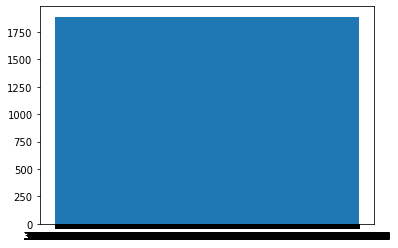

In [120]:
list(nx.connected_components(G))
degree = sorted(d for n, d in G.degree())
# print(degree)
# plt.hist(degree, bins=1000)
subset_data = nx.get_node_attributes(G,'ctime')
#print(list(subset_data.values()))
plt.hist(subset_data)

# 5. Visualization
NetworkX provides basic functionality for visualizing graphs, **but its main goal is to enable graph analysis rather than perform graph visualization**. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.